In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To hide indexing by pandas, specify the index column manually)
df = pd.read_csv('pokemon.csv', index_col='#')

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Distribution of Pokemon Types:

<Axes: ylabel='count'>

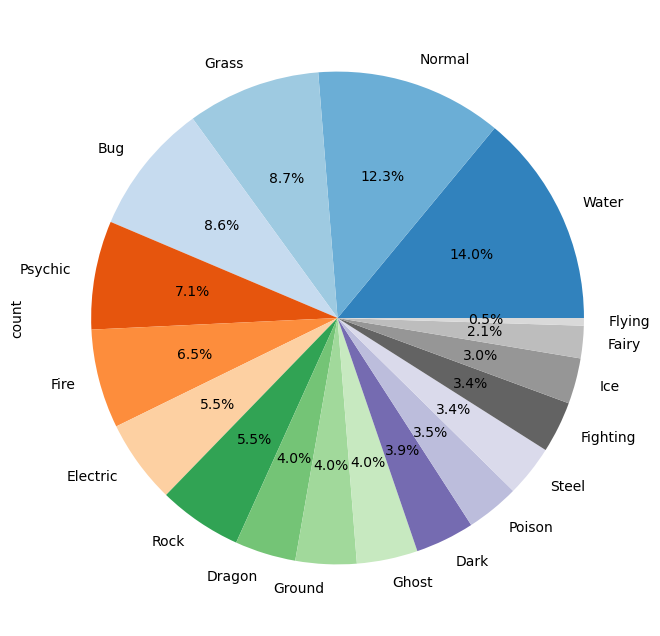

In [6]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

#### Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

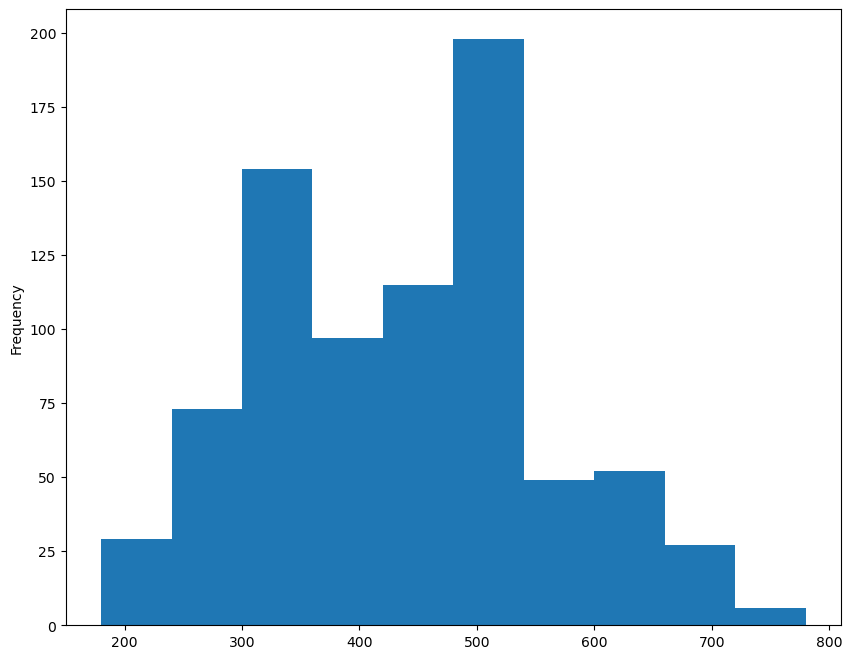

In [7]:
df['Total'].plot(kind='hist', figsize=(10, 8))

<Axes: >

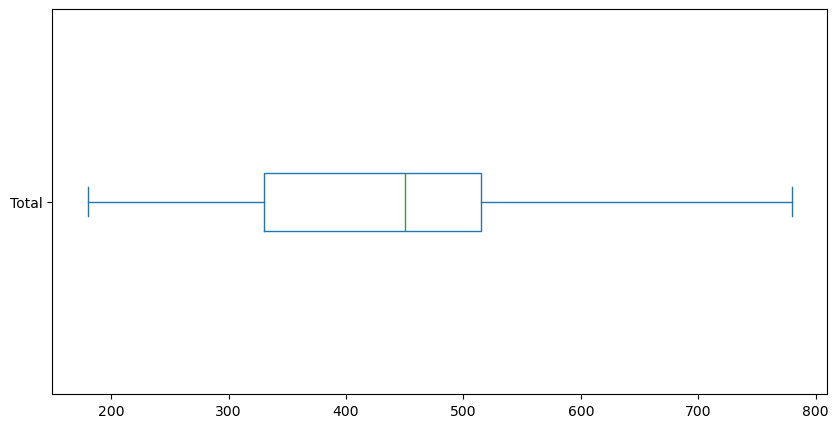

In [8]:
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

#### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

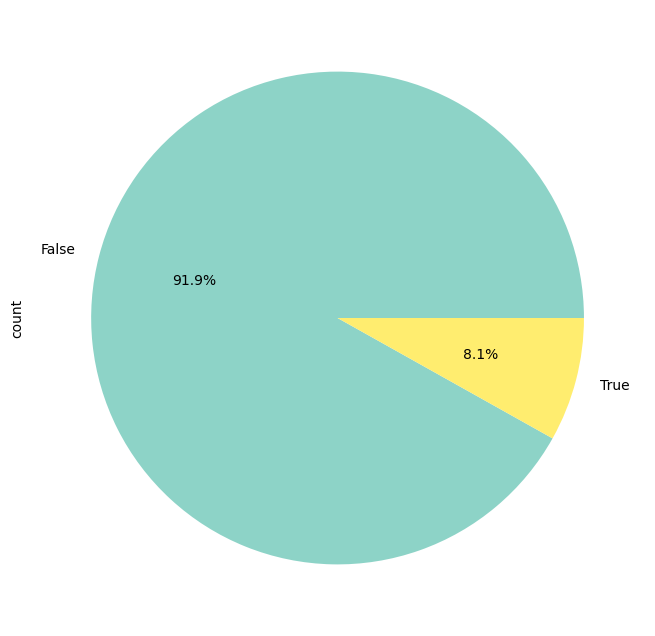

In [9]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

### Basic filtering

Let's start with a few simple activities regarding filtering.

##### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

In [10]:
# Method 1

df.loc[df['Attack'] > 150]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [11]:
# Method 2

df.query("Attack > 150")

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


#### 2. Select all pokemons with a Speed of 10 or less

C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Speed'>

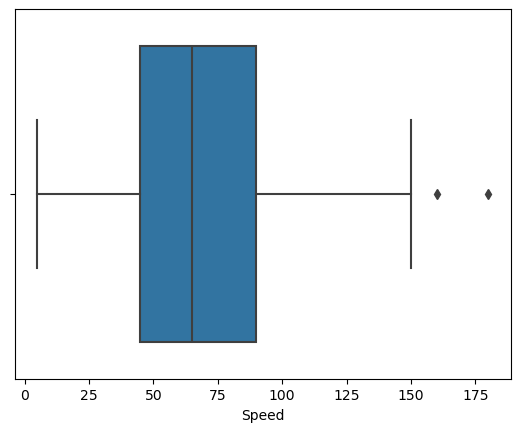

In [12]:
sns.boxplot(data=df, x='Speed')

In [13]:
df.loc[df['Speed'] <=10]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


#### 3. How many Pokemons have a Sp. Def value of 25 or less?

In [14]:
# Method 1

(df['Sp. Def'] <=25).sum()

18

In [15]:
# Method 2

df.loc[df['Sp. Def'] <=25]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


#### 4. Select all the Legendary pokemons

In [16]:
df.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [17]:
df['Legendary'].sum()

65

#### 5. Find the outlier

Finding the pokemon who is clearly an outlier in terms of Attack/Defense:

C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


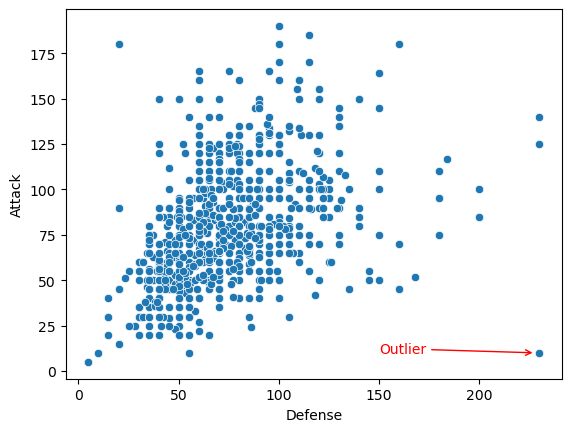

In [18]:
ax = sns.scatterplot(data=df, x='Defense', y='Attack')
ax.annotate(
    "Outlier", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='Red')
);

In [19]:
df.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [20]:
df.sort_values(by='Defense', ascending=False).head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


#### 6. How many Fire-Flying Pokemons are there?

In [21]:
# Method 1
((df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fire')).sum()


64

In [22]:
((df['Type 1'] == 'Flying') | (df['Type 2'] == 'Flying')).sum()

101

In [23]:
(df[['Type 1', 'Type 2']].apply(lambda x: 'Fire' in x.values, axis=1)).sum()

64

In [24]:
count_fire = 0

for index, row in df.iterrows():
    if 'Fire' in [row['Type 1'], row['Type 2']]:
        count_fire += 1

print(count_fire)


64


In [25]:
(df['Type 1'].isin(['Fire', 'Flying'])).sum()

56

In [26]:
((df['Type 1'].isin(['Fire', 'Flying'])) | (df['Type 2'].isin(['Fire', 'Flying']))).sum()

159

In [27]:
target_types = ['Fire', 'Flying']
((df['Type 1'].isin(target_types)) | (df['Type 2'].isin(target_types))).sum()

159

In [28]:
target_types = ['Fire', 'Flying']
(df.apply(lambda row: any(type in target_types for type in row[['Type 1', 'Type 2']]), axis=1)).sum()

159

In [29]:
target_types = ['Fire', 'Flying']
(df[['Type 1', 'Type 2']].isin(target_types).any(axis=1)).sum()

159

In [30]:
(
    (df['Type 1'] == 'Fire') & 
    (df['Type 2'] == 'Flying')

).sum()

6

In [33]:
df.loc[(
    (df['Type 1'] == 'Fire') & 
    (df['Type 2'] == 'Flying')

).sum()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [31]:
(
    (df['Type 1'].isin(['Fire', 'Flying'])) &
    (df['Type 2'].isin(['Fire', 'Flying']))
).sum()

6

In [32]:
df.loc[(
    (df['Type 1'].isin(['Fire', 'Flying'])) &
    (df['Type 2'].isin(['Fire', 'Flying']))
).sum()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


#### 7. How many 'Poison' pokemons are across both types?

In [34]:
df.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [39]:
((df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')).sum()

62

In [42]:
df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')].shape

(62, 12)

#### 8. What pokemon of Type 1 Ice has the strongest defense?

In [43]:
df.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [45]:
df.loc[df['Type 1'] == 'Ice', 'Defense'].max()

184

In [47]:
df.loc[
    (df['Type 1'] == 'Ice') & 
    (df['Defense'] == df.loc[df['Type 1'] == 'Ice', 'Defense'].max())
].head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [48]:
df.loc[df['Type 1'] == 'Ice'].sort_values('Defense', ascending=False).head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
471,Glaceon,Ice,NaN,525,65,60,110,130,95,65,4,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False


#### 9. What's the most common type of Legendary Pokemons?

<Axes: xlabel='Type 1'>

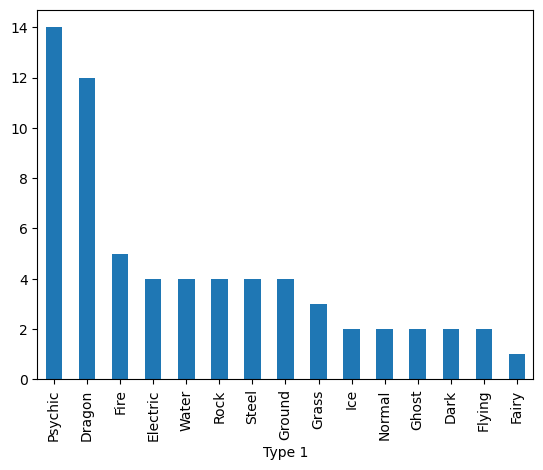

In [51]:
df.loc[df['Legendary'], 'Type 1'].value_counts().plot(kind='bar')
#df[df['Legendary']]['Type 1'].value_counts().plot(kind='bar')


In [52]:
df.loc[df['Legendary'], 'Type 1'].value_counts()

Type 1
Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64

In [53]:
df.loc[df['Legendary'], 'Type 1']

#
144         Ice
145    Electric
146        Fire
150     Psychic
150     Psychic
         ...   
719        Rock
719        Rock
720     Psychic
720     Psychic
721        Fire
Name: Type 1, Length: 65, dtype: object

#### 10. What's the most powerful pokemon from the first 3 generations, of type water?

In [54]:
df.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [56]:
df.loc[df['Type 1'] == 'Water']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
54,Psyduck,Water,NaN,320,50,52,48,65,50,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
656,Froakie,Water,NaN,314,41,56,40,62,44,71,6,False
657,Frogadier,Water,NaN,405,54,63,52,83,56,97,6,False
658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False


<Axes: xlabel='Generation'>

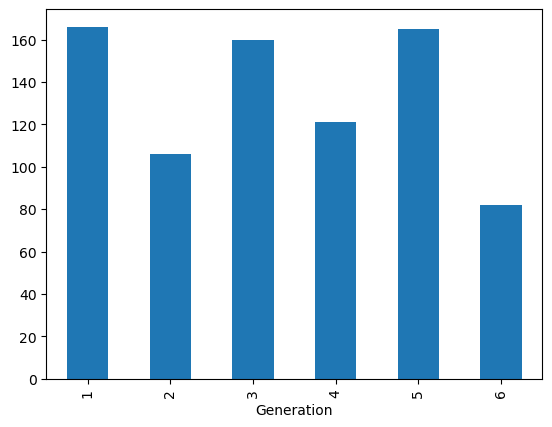

In [58]:
df['Generation'].value_counts(sort=False).plot(kind='bar')

In [59]:
df['Generation'].isin([1,2,3]).sum()

432

In [61]:
df.loc[
    (df['Type 1'] == 'Water') &
     df['Generation'].isin([1,2,3])
     ].sort_values(by='Total', ascending=False).head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


#### 11. What's the most powerful Dragon from the last two generations?

In [62]:
df['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [64]:
df.loc[
    ((df['Type 1'] == 'Dragon') |
    (df['Type 2'] == 'Dragon')) &
    (df['Generation'].isin({5,6}))
]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
610,Axew,Dragon,NaN,320,46,87,60,30,40,57,5,False
611,Fraxure,Dragon,NaN,410,66,117,70,40,50,67,5,False
612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False
621,Druddigon,Dragon,NaN,485,77,120,90,60,90,48,5,False
633,Deino,Dark,Dragon,300,52,65,50,45,50,38,5,False
634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False
635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True


In [65]:
df.loc[
    ((df['Type 1'] == 'Dragon') |
    (df['Type 2'] == 'Dragon')) &
    (df['Generation'].isin({5,6}))
].sort_values(by='Total', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False


#### 12. Select most powerful Fire-type pokemons

#### 13. Select all Water-type, Flying-type pokemons

In [66]:
df.query("`Type 1` == 'Water' and `Type 2` == 'Flying'")

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


#### 14. Select specific columns of Legendary pokemons of type Fire

In [67]:
df.loc[(df['Type 1'] == 'Fire') & df['Legendary']]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


#### 15. Select Slow and Fast pokemons

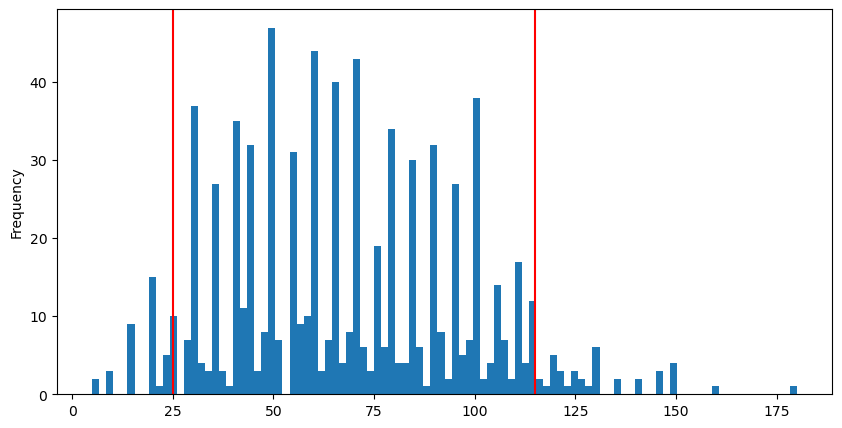

In [68]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

#### 16. Find the Ultra Powerful Legendary Pokemon

C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(160, 150, "Who's this guy?")

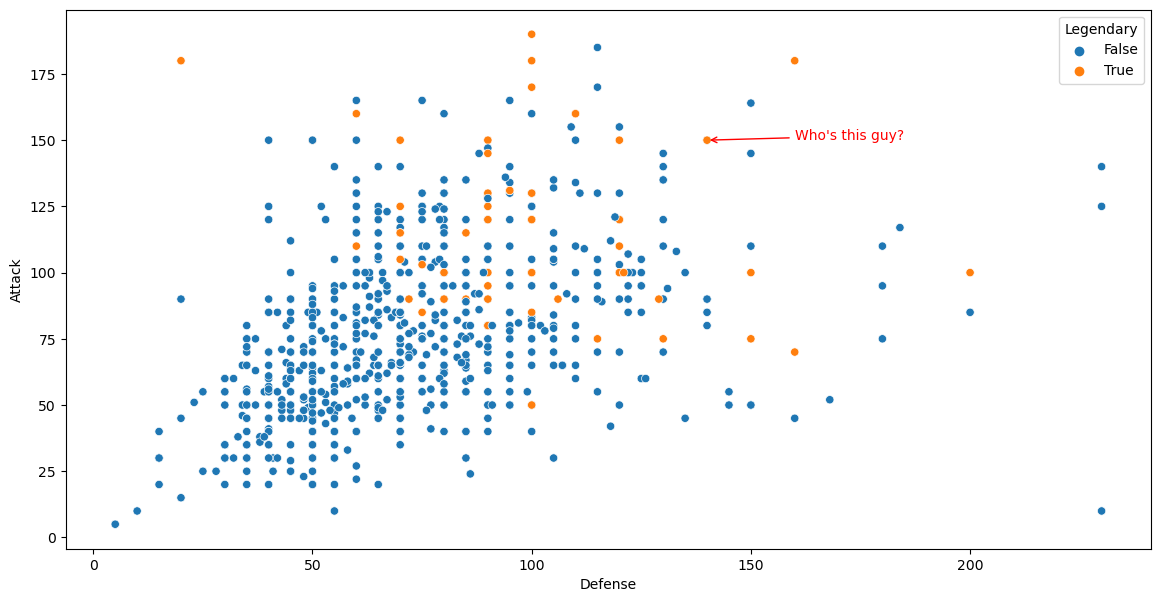

In [69]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)